In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/DairoArley/internet-firewall-data/main/log2.csv'
df = pd.read_csv(url)
##type(df)
##print(pd.unique(df["Action"]))
df.head()


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [2]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [3]:
print(df.value_counts(df['Action'], sort = True))

Action
allow         37640
deny          14987
drop          12851
reset-both       54
dtype: int64


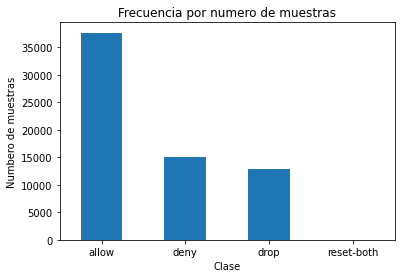

In [4]:
import matplotlib.pyplot as plt
count_classes = pd.value_counts(df['Action'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
##plt.xticks(range(2), LABELS)
plt.title("Frecuencia por numero de muestras")
plt.xlabel("Clase")
plt.ylabel("Numbero de muestras");

In [5]:
x=df.loc[:, ~df.columns.isin(['Action'])]
y= df['Action']
print(y)

#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#yy = le.fit_transform(y)
#print(yy)



0        allow
1        allow
2        allow
3        allow
4        allow
         ...  
65527    allow
65528    allow
65529     drop
65530     drop
65531     drop
Name: Action, Length: 65532, dtype: object


In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm



In [7]:
#ejercicio de código
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import numpy as np


import itertools 
def experiementarSVC(x, y, kernels, gammas,params_reg):
    """función que realizar experimentos sobre un SVM para clasificación
    
    x: numpy.Array, con las caracteristicas del problema
    y: numpy.Array, con la variable objetivo
    kernels: List[str], lista con valores a pasar 
        a sklearn correspondiente al kernel de la SVM
    gammas: List[float], lista con los valores a pasar a
        sklean correspondiente el valor de los coeficientes para usar en el
        kernel
    params_reg: List[float], lista con los valores a a pasar a 
        sklearn para ser usados como parametro de regularización
    
    retorna: pd.Dataframe con las siguientes columnas:
        - 3 columnas con los tres parametros: kernel, gamma, param de regularizacion
        - error cuadratico medio en el cojunto entrenamiento (promedio de los 4 folds)
        - error cuadratico medio en el cojunto test (promedio de los 4 folds)
        - % de Vectores de Soporte promedio para los 4 folds (0 a 100)
    """
    idx = 0
    kf = StratifiedKFold(n_splits=4)
    # crear una lista con la combinaciones de los elementos de cada list
    kernels_gammas_regs = list(itertools.product(kernels, gammas, params_reg))
    resultados = pd.DataFrame()
    
    for params in kernels_gammas_regs:
        kernel, gamma, param_reg = params
        print("parametros usados", params) # puede usar para ver los params
        errores_train = []
        errores_test = []
        pct_support_vectors = []
        for train_index, test_index in kf.split(x, y):
            X_train, X_test = x.iloc[list(train_index)], x.iloc[list(test_index)]
            y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
            # normalizar los datos
            scaler = StandardScaler().fit(X_train)
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            svmm = svm.SVC(kernel=kernel, gamma=gamma, C=param_reg)
            # Entrenar el modelo
            svmm.fit(X=X_train, y=y_train)    
            # calculo de errores
            y_train_pred = svmm.predict(X=X_train)
            y_test_pred = svmm.predict(X=X_test)
            # error y pct de vectores de soporte
            errores_train.append(accuracy_score(y_true=y_train, y_pred = y_train_pred))
            errores_test.append(accuracy_score(y_true = y_test, y_pred = y_test_pred))
            # contar muestras de entrenamiento
            n_train = X_train.shape[0]
            pct_vs = (len(svmm.support_vectors_)/n_train)*100
            pct_support_vectors.append(pct_vs)
        
        resultados.loc[idx,'kernel'] = kernel
        resultados.loc[idx,'gamma'] = gamma
        resultados.loc[idx,'param_reg'] = param_reg
        resultados.loc[idx,'error de entrenamiento'] = np.mean(errores_train)
        resultados.loc[idx,'error de prueba'] = np.mean(errores_test)
        resultados.loc[idx,'% de vectores de soporte'] = np.mean(pct_support_vectors)
        idx+=1
    return (resultados)

In [8]:
resultadosSVC = experiementarSVC(x = x,y=y,
                                 kernels=['linear', 'rbf'],
                                 gammas = [0.01,0.1],
                                 params_reg = [0.01,0.1, 1.0]
                                )

resultadosSVC

parametros usados ('linear', 0.01, 0.01)
parametros usados ('linear', 0.01, 0.1)
parametros usados ('linear', 0.01, 1.0)
parametros usados ('linear', 0.1, 0.01)
parametros usados ('linear', 0.1, 0.1)
parametros usados ('linear', 0.1, 1.0)
parametros usados ('rbf', 0.01, 0.01)
parametros usados ('rbf', 0.01, 0.1)
parametros usados ('rbf', 0.01, 1.0)
parametros usados ('rbf', 0.1, 0.01)
parametros usados ('rbf', 0.1, 0.1)
parametros usados ('rbf', 0.1, 1.0)


,kernel,gamma,param_reg,error de entrenamiento,error de prueba,% de vectores de soporte
0,linear,0.01,0.01,0.952603,0.953076,14.799894
1,linear,0.01,0.10,0.983062,0.982894,6.634418
2,linear,0.01,1.00,0.989756,0.989684,3.473621
3,linear,0.10,0.01,0.952603,0.953076,14.799894
4,linear,0.10,0.10,0.983062,0.982894,6.634418
5,linear,0.10,1.00,0.989756,0.989684,3.473621
6,rbf,0.01,0.01,0.891798,0.891656,53.584000
7,rbf,0.01,0.10,0.926784,0.926997,25.259924
8,rbf,0.01,1.00,0.971912,0.959791,11.748459
9,rbf,0.10,0.01,0.927287,0.927303,26.049869


In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def experiementarDiscriminanteCuadratico(x, y):
    idx = 0
    kf = StratifiedKFold(n_splits=4)   
    resultados = pd.DataFrame()
    
    errores_train = []
    errores_test = []
    for train_index, test_index in kf.split(x, y):
        X_train, X_test = x.iloc[list(train_index)], x.iloc[list(test_index)]
        y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
        # normalizar los datos
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        qda = QuadraticDiscriminantAnalysis()
        model2 = qda.fit(X_train, y_train)
        # calculo de errores
        y_train_pred = model2.predict(X=X_train)
        y_test_pred = model2.predict(X=X_test)
        # error y pct de vectores de soporte
        errores_train.append(accuracy_score(y_true=y_train, y_pred = y_train_pred))
        errores_test.append(accuracy_score(y_true = y_test, y_pred = y_test_pred))
        # contar muestras de entrenamiento
        n_train = X_train.shape[0]
        
        resultados.loc[idx,'error de entrenamiento'] = np.mean(errores_train)
        resultados.loc[idx,'error de prueba'] = np.mean(errores_test)
        idx+=1
    return (resultados)

In [13]:
resultadosDiscriminanteCuadratico= experiementarDiscriminanteCuadratico(x = x,y=y)

resultadosDiscriminanteCuadratico

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,error de entrenamiento,error de prueba
0,0.687379,0.649149
1,0.631447,0.614265
2,0.637429,0.631793
3,0.622378,0.617759


In [23]:
## Gradient Boosting tree
from sklearn.ensemble import GradientBoostingClassifier
def experimentar_gbt(num_trees, X, Y):
    """funcion que realiza experimentos de arboles de decision
    num_trees: list[int] lista con el número de arboles usado para el RF
    X: matriz con las caractersiticas
    Y: matriz de numpy con etiquetas
    retorna: dataframe con:
        - numero de arboles usados
        - eficiencia de entrenamiento
        - desviacion de estandar eficiencia de entrenamiento
        - eficiencia de prueba
        - desviacion estandar eficiencia de prueba
    """
    folds = 4
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for trees in num_trees:
        ## para almacenar los errores intermedios
        EficienciaTrain = []
        EficienciaVal = []
        for train, test in skf.split(X, Y):
            Xtrain = X.iloc[train,:]
            Ytrain = Y.iloc[train]
            Xtest = X.iloc[test,:]
            Ytest = Y.iloc[test]
            #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
            modelo=GradientBoostingClassifier(n_estimators=trees)
            modelo.fit(Xtrain, Ytrain)
            #predecir muestras de entrenamiento
            Ytrain_pred = modelo.predict(Xtrain)
            #predecir muestras de pruebas
            Yest = modelo.predict(Xtest)
            #Evaluamos las predicciones del modelo con los datos de test
            EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
            EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))

        resultados.loc[idx,'número de arboles'] = trees
        resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
        resultados.loc[idx,'eficiencia de prueba'] =np.mean(EficienciaVal)
        resultados.loc[idx,'desviacion estandar prueba'] = np.std(EficienciaVal)
        idx= idx +1
        
    return (resultados)

In [25]:
arboles = [5,10,20,50,100]
resultados_gbt = experimentar_gbt(arboles, x, y)
resultados_gbt

,número de arboles,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba
0,5.0,0.997029,0.000273,0.996643,0.000544
1,10.0,0.997401,0.000192,0.996750,0.000458
2,20.0,0.997859,0.000296,0.997101,0.000370
3,50.0,0.999140,0.000094,0.998230,0.000459
4,100.0,0.999619,0.000067,0.997375,0.000407


In [14]:
## redes neuronales artificiales
from sklearn.neural_network import MLPClassifier

def output_activation_MPC():
    """funcion que entrena un modelo
    con data aleatoria para confirmar la funcion
    de activacion de la ultima capa
    """
    mlp = MLPClassifier()
    # fit with some random data
    xrandom = np.random.rand(10,2)
    yrandom = np.zeros(10)
    # llamar el metodo adecuado para entrenar
    # el mlp con los x y 'y' random
    mlp.fit(xrandom,yrandom )
    # retornar el atributo de mlp adecuado
    return (mlp.out_activation_)

def experimetar_mlpc(X,Y, num_hidden_layers, num_neurons):
    """ función para realizar experimentos con el MLP
    x: matriz de numpy con caracteristicas
    y: vector numpy con las variables a predecir
    num_hidden_layers: list de enteros con el numero de capdas
        ocultas a usar
    num_neurons: list de enteros con el numero de neuronas a usar
    
    Retorna: dataframe con 4 columnas:
        - numero de capas, numero de neuronas
        - promedio de error prueba (exactitud/eficiencia) de claisficacion y desviación estandar        
    """
    from sklearn.metrics import accuracy_score
    #Validamos el modelo
    Folds = 4
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    for hidden_layers in num_hidden_layers:
        for neurons in num_neurons:
            for j, (train, test) in enumerate(skf.split(X, Y)):
                # para almacenar errores intermedios
                Error = np.zeros(Folds)
                Xtrain = X.iloc[train,:]
                Ytrain = Y.iloc[train]
                Xtest = X.iloc[test,:]
                Ytest = Y.iloc[test]
                #Normalizamos los datos
                scaler = StandardScaler().fit(X= Xtrain)       
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                # prestar atención a los parametros, correctos.
                hidden_layer_sizes = tuple(hidden_layers*[neurons])
                #print(hidden_layers*[neurons])
                #print(hidden_layer_sizes)
                mlp = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, activation='tanh', max_iter=400)
                # entrenar el MLP
                mlp.fit(X=Xtrain,y=Ytrain)
                #Use para el modelo para hacer predicciones sobre el conjunto Xtest
                Yest = mlp.predict(X=Xtest)
                Error[j] = accuracy_score(y_true=Ytest, y_pred=Yest)
                #print(accuracy_score(Ytest, Yest))
        
            print('error para configuracion de params = ' + str(np.mean(Error)) + '+-' + str(np.std(Error)))
        
            resultados.loc[idx,'capas ocultas'] = hidden_layers
            resultados.loc[idx,'neuronas en capas ocultas'] = neurons 
            resultados.loc[idx,'error de prueba(media)'] = np.mean(Error)
            resultados.loc[idx,'intervalo de confianza'] = np.std(Error)
            idx+=1
    return (resultados)

In [15]:
resultados_mlpc = experimetar_mlpc(x,y, [1,2], [12,16,20,24])

error para configuracion de params = 0.24772630165415369+-0.42907454083612817
error para configuracion de params = 0.24752792528840872+-0.42873094289163705
error para configuracion de params = 0.24763474333150218+-0.42891595716944
error para configuracion de params = 0.24763474333150218+-0.42891595716944
error para configuracion de params = 0.24891655984862357+-0.4311361285030752
error para configuracion de params = 0.2489470792895074+-0.4311889897253046
error para configuracion de params = 0.24897759873039127+-0.4312418509475341
error para configuracion de params = 0.24897759873039127+-0.4312418509475341


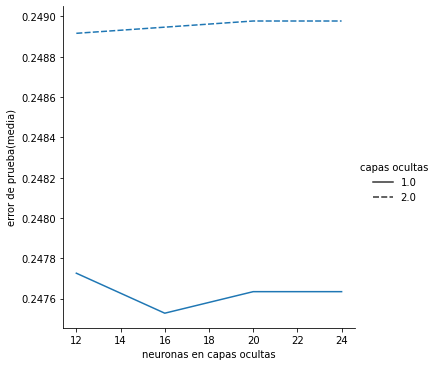

In [16]:
import seaborn as sns
sns.relplot(data = resultados_mlpc,  x='neuronas en capas ocultas', y = 'error de prueba(media)', style= 'capas ocultas', kind = 'line')

In [17]:
resultados_mlpc

,capas ocultas,neuronas en capas ocultas,error de prueba(media),intervalo de confianza
0,1.0,12.0,0.247726,0.429075
1,1.0,16.0,0.247528,0.428731
2,1.0,20.0,0.247635,0.428916
3,1.0,24.0,0.247635,0.428916
4,2.0,12.0,0.248917,0.431136
5,2.0,16.0,0.248947,0.431189
6,2.0,20.0,0.248978,0.431242
7,2.0,24.0,0.248978,0.431242


In [25]:
## indice de fisher
#ejercicio de código
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
def entrenamiento_lda_ext_caracteristicas(n_comp, X, Y):
    """
    Esta función realiza la reducción de la dimensionalidad sobre el conjunto de
    datos de entrenamiento, de acuerdo con las particiones especificadas usando PCA

    Parámetros:
    n_comp, int, Número de componentes para reducción
    n_sets,int, Número de particiones
    X: numpy Array de características
    Y: numpy Array  Vector de etiquetas

    Retorna: 
    ErrorValidacion: El valor medio de errores
    IC_Validacion: Intervalo de confianza
    T_ejec:  El  valor medio del tiempo de ejecución
    """
   

    #Implemetamos la metodología de validación 
    Errores = np.ones(5)
    times = np.ones(5)
    j = 0
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X):  
        X_train, X_test = x.iloc[list(train_index)], x.iloc[list(test_index)]
        y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
        
        # ¿es necesario estandarizacion de datos?
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        # dejar el nombre del objeto igual (lda)
        lda = LinearDiscriminantAnalysis(n_components=n_comp)
        # para calcular costo computacional
        # es recomendable usar el metodo que ajusta y transforma
        X_train_lda = lda.fit_transform(X=X_train, y=y_train)
        # aca solo usar el metodo de transformar (ya que en el anterior el pca se ajusto)
        X_test_lda = lda.transform(X=X_test)
        # entrenar el modelo usando las caractieristicas transformadas por PCA
        clf = svm.SVC(kernel="linear", C=1)
        clf.fit(X=X_train_lda, y=y_train)
        Errores[j] = accuracy_score(y_true=y_test, y_pred=clf.predict(X=X_test_lda))
        j+=1


    return np.mean(Errores), np.std(Errores)


In [23]:

#ejercicio de código
def experimentar_LDA(n_feats, X, Y):
    """
    Esta función realiza la comparación del desempeño de RFE utilizando diferente 
    número de feats y particionando el conjunto de datos en diferente número de 
    subconjuntos

    Parámetros:
    X (numpy.array), El arreglo numpy de características
    Y (numpy.array), El vector de etiquetas
    n_feats, Vector de números enteros que indica el número de características
              que debe utilizar el modelo
    n_sets, Vector de números enteros que indica el número de particiones

    Retorna:  
    - DataFrame con las columnas: DESCRIPCION, ERROR_VALIDACION, IC_STD_VALIDACION, 
    y T_EJECUCION. 

    """
    """
    Esta función realiza la comparación del desempeño de RFE utilizando diferente 
    número de feats y particionando el conjunto de datos en diferente número de 
    subconjuntos

    Parámetros:
    X (numpy.array), El arreglo numpy de características
    Y (numpy.array), El vector de etiquetas
    n_feats, Vector de números enteros que indica el número de características
              que debe utilizar el modelo
    n_sets, Vector de números enteros que indica el número de particiones

    Retorna:  
    - DataFrame con las columnas: DESCRIPCION, ERROR_VALIDACION, IC_STD_VALIDACION, 
    y T_EJECUCION. 

    """
    df = pd.DataFrame()
    idx = 0
    split_number = 5
    #Con selección de características
    
    for f in n_feats:
        #Implemetamos la metodología de validación 
        error, ic_error = entrenamiento_lda_ext_caracteristicas(n_comp=f, X=x,Y=y)
        df.loc[idx,'CON_SEL'] = 'SI'
        df.loc[idx,'NUM_VAR'] = f
        df.loc[idx,'ERROR_VALIDACION'] = error
        df.loc[idx, 'IC_STD_VALIDACION'] = ic_error
        
        idx+=1
    return df

In [24]:
experimentar_LDA(n_feats=[1,2], X= x, Y = y)

,CON_SEL,NUM_VAR,ERROR_VALIDACION,IC_STD_VALIDACION
0,SI,1.0,0.939954,0.028752
1,SI,2.0,0.972899,0.001898


In [29]:
df.corr()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
Source Port,1.000000,-0.332246,0.145391,-0.024843,0.000221,-0.000931,0.001950,-0.001742,-0.046515,-0.001422,-0.001962
Destination Port,-0.332246,1.000000,-0.281676,0.410042,-0.005297,0.001675,-0.014684,-0.006063,0.023537,-0.002134,-0.010909
NAT Source Port,0.145391,-0.281676,1.000000,0.178435,0.010659,0.002242,0.020827,0.012633,0.141485,0.007180,0.018772
NAT Destination Port,-0.024843,0.410042,0.178435,1.000000,0.003975,0.007904,-0.003216,0.004605,0.219776,0.006136,0.001747
Bytes,0.000221,-0.005297,0.010659,0.003975,1.000000,0.933462,0.830225,0.974379,0.148834,0.966548,0.850209
Bytes Sent,-0.000931,0.001675,0.002242,0.007904,0.933462,1.000000,0.575047,0.887596,0.126039,0.973976,0.639098
Bytes Received,0.001950,-0.014684,0.020827,-0.003216,0.830225,0.575047,1.000000,0.843067,0.143601,0.690959,0.946039
Packets,-0.001742,-0.006063,0.012633,0.004605,0.974379,0.887596,0.843067,1.000000,0.147074,0.961286,0.916978
Elapsed Time (sec),-0.046515,0.023537,0.141485,0.219776,0.148834,0.126039,0.143601,0.147074,1.000000,0.135101,0.143954
pkts_sent,-0.001422,-0.002134,0.007180,0.006136,0.966548,0.973976,0.690959,0.961286,0.135101,1.000000,0.771550


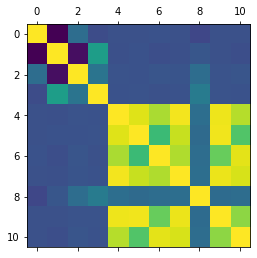

In [30]:
plt.matshow(x.corr())

In [11]:
#ejercicio de código PCA
from sklearn.decomposition import PCA
def entrenamiento_pca_ext_caracteristicas(n_comp, X, Y):
    """
    Esta función realiza la reducción de la dimensionalidad sobre el conjunto de
    datos de entrenamiento, de acuerdo con las particiones especificadas usando PCA

    Parámetros:
    n_comp, int, Número de componentes para reducción
    n_sets,int, Número de particiones
    X: numpy Array de características
    Y: numpy Array  Vector de etiquetas

    Retorna: 
    ErrorValidacion: El valor medio de errores
    IC_Validacion: Intervalo de confianza
    T_ejec:  El  valor medio del tiempo de ejecución
    """  
    #Implemetamos la metodología de validación 
    Errores = np.ones(5)
    j = 0
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X):  
        X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
        y_train, y_test = Y.iloc[list(train_index)], Y.iloc[list(test_index)]
        
        # ¿es necesario estandarizacion de datos?
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        #dejar el mismo nombre del objeto 
        pca = PCA(n_components=n_comp)
        # para calcular costo computacional
        # es recomendable usar el metodo que ajusta y transforma
        X_train_pca = pca.fit_transform(X=X_train)        
        # aca solo usar el metodo de transformar (ya que en el anterior el pca se ajusto)
        X_test_pca = pca.transform(X=X_test)
        # entrenar el modelo usando las caractieristicas transformadas por PCA
        clf = svm.SVC(kernel="linear", C=1)
        clf.fit(X=X_train_pca, y=y_train)
        Errores[j] = accuracy_score(y_true=y_test, y_pred=clf.predict(X=X_test_pca))
        j+=1
    return np.mean(Errores), np.std(Errores)

In [12]:
#ejercicio de código
from sklearn.model_selection import KFold

def experimentar_PCA(n_feats, X, Y):
    """
    Esta función realiza la comparación del desempeño de RFE utilizando diferente 
    número de feats y particionando el conjunto de datos en diferente número de 
    subconjuntos

    Parámetros:
    X (numpy.array), El arreglo numpy de características
    Y (numpy.array), El vector de etiquetas
    n_feats, Vector de números enteros que indica el número de características
              que debe utilizar el modelo
    n_sets, Vector de números enteros que indica el número de particiones

    Retorna:  
    - DataFrame con las columnas: CON_SEL, NUM_VAR, ERROR_VALIDACION, IC_STD_VALIDACION, 
    y T_EJECUCION. 

    """
    df = pd.DataFrame()
    idx = 0
    split_number = 5
    
    for f in n_feats:
        #Implemetamos la metodología de validación 
        error, ic_error = entrenamiento_pca_ext_caracteristicas(n_comp=f, X=X,Y=Y)
        df.loc[idx,'CON_SEL'] = 'SI'
        df.loc[idx,'NUM_VAR'] = f
        df.loc[idx,'ERROR_VALIDACION'] = error
        df.loc[idx, 'IC_STD_VALIDACION'] = ic_error
        idx+=1
    return df

In [ ]:
experimentar_PCA(n_feats=[2,5,10,15,20], X= x, Y = y)

In [16]:
##todo
from sklearn.model_selection import KFold
def entrenamiento_sin_seleccion_caracteristicas(splits, X, Y):
    """
    Función que ejecuta el entrenamiento del modelo sin una selección particular
    de las características

      Parámetros:splits : numero de particiones  a realizar
      Retorna:
      1. El modelo entreando
      2. El vector de errores
      3. El Intervalo de confianza
      4. El tiempo de procesamiento
    """
    #Implemetamos la metodología de validación
    Errores = np.ones(splits)
    Score = np.ones(splits)
    j = 0
    kf = KFold(n_splits=splits)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
        y_train, y_test = Y.iloc[list(train_index)], Y.iloc[list(test_index)]
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        #Creamos el clasificador SVM.
        clf = svm.SVC(kernel="linear", C=1)
        #Aquí se entran y se valida el modelo sin hacer selección de características
        ######
        # Entrenamiento el modelo.
        #Para calcular el costo computacional
        clf.fit(X_train,y_train)
        # Validación del modelo
        Errores[j] = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
        j+=1

    return clf, np.mean(Errores), np.std(Errores)

In [17]:
def recursive_feature_elimination_wrapper(estimator, feature_numbers, X,Y):
    """
    Esta función es un envoltorio del objeto RFE de sklearn

    Parámetros:
    estimator(sklearn.svm.SVC), El estimador SVM
    feature_numbers(int), El número de características a considerar
    X (numpy.array), El arreglo numpy de características
    Y (numpy.array), El vector de etiquetas

    Retorna:
    El modelo entrenado ()
    La máscara de características seleccionada, array [longitud de caracterisitcas de X]
    El rankeo de características, array [longitud de caracterisitcas de X]
    El objeto RFE entrenado sobre el set reducido de características
    El tiempo de ejecución
    """
    rfe = RFE(estimator=estimator, n_features_to_select = feature_numbers, step=1)
    rfe.fit(X=X, y=Y)
    feature_mask = rfe.support_
    features_rank = rfe.ranking_
    estimator = rfe.estimator_

    return rfe, feature_mask, features_rank, estimator

In [14]:
#ejercicio de código
def experimentar(n_feats, n_sets, X, Y):
    """
    Esta función realiza la comparación del desempeño de RFE utilizando diferente 
    número de feats y particionando el conjunto de datos en diferente número de 
    subconjuntos

    Parámetros:
    X (numpy.array), El arreglo numpy de características
    Y (numpy.array), El vector de etiquetas
    n_feats, Vector de números enteros que indica el número de características
              que debe utilizar el modelo
    n_sets, Vector de números enteros que indica el número de particiones

    Retorna:  
    - DataFrame con las columnas: CON_SEL, NUM_VAR, NUM_SPLITS, ERROR_VALIDACION, IC_STD_VALIDACION, 
    y T_EJECUCION. 

    """
    df = pd.DataFrame()
    idx = 0
    for split_number in n_sets: 
    #Sin selección de características
        # se ignorar las otras salidas
        _,err,ic= entrenamiento_sin_seleccion_caracteristicas(split_number, X,Y)  
        df.loc[idx,'CON_SEL'] = 'NO'
        df.loc[idx,'NUM_VAR'] = X.shape[1]
        df.loc[idx,'NUM_SPLITS'] = split_number
        df.loc[idx,'ERROR_VALIDACION'] = err
        df.loc[idx,'IC_STD_VALIDACION'] = ic
        idx+=1
    print("termina experimentos sin selección")
    #Con selección de características
    for f in n_feats:
        for split_number in n_sets:
            #Implemetamos la metodología de validación 
            Errores = np.ones(split_number)
            Score = np.ones(split_number)
            kf = KFold(n_splits=split_number) #StratifiedKFold()
            j = 0
            for train_index, test_index in kf.split(X):
                
                X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
                y_train, y_test = Y.iloc[list(train_index)], Y.iloc[list(test_index)]
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)
                
                svc =  svm.SVC(kernel="linear", C=1)
                
                # se ignorar las otras salidas
                rfe, _, _, _, t = recursive_feature_elimination_wrapper(estimator=svc,feature_numbers=f, X=X_train,Y=y_train)
            
                Errores[j]=accuracy_score(y_true=y_test, y_pred=rfe.predict(X_test))
                j+=1

            df.loc[idx,'CON_SEL'] = 'SI'
            df.loc[idx,'NUM_VAR'] = f
            df.loc[idx,'NUM_SPLITS'] = split_number
            df.loc[idx,'ERROR_VALIDACION'] = np.mean(Errores)
            df.loc[idx, 'IC_STD_VALIDACION'] = np.std(Errores)
            idx+=1
    return df

In [ ]:
dfr = experimentar(n_feats = [3, 5, 10,15,20], n_sets = [5, 10], X= x, Y=y)

In [ ]:
dfr.sort_values(['ERROR_VALIDACION','T_EJECUCION'], ascending=[False, True])

In [ ]:
svc =  SVC(kernel="linear", C=1)
rfe, feature_mask, _, _, _ = recursive_feature_elimination_wrapper(svc, 10, x,y)
print("esta es la mascara (deberia ser solo valores True y False) \n", feature_mask)

In [ ]:
### nuevo
#from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(x, y)
sfs1.subsets_

In [ ]:
### nuevo
#from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, 
           k_features=6, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(x, y)
sfs1.subsets_

In [ ]:
### nuevo
#from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, 
           k_features=9, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(x, y)
sfs1.subsets_

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['comp 1', 'comp2','comp 3', 'comp4','comp5', 'comp6','comp7', 'comp8','comp9'])
print(principalDf)
pca.explained_variance_ratio_

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['comp 1', 'comp2','comp 3', 'comp4','comp5', 'comp6'])
print(principalDf)
pca.explained_variance_ratio_

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['comp 1', 'comp2','comp 3'])
print(principalDf)
pca.explained_variance_ratio_